In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [2]:
SEED_VALUE = 42
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
## Loading dataset

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

boston_features = {
    'Average Number of Rooms': 5,
}

X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2
(404,)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

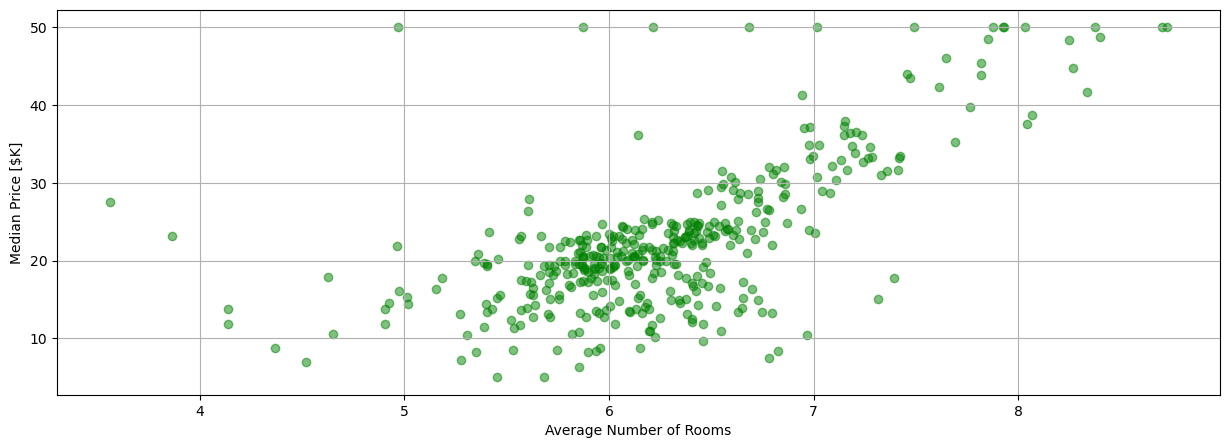

In [4]:
## Visualizations

plt.figure(figsize=(15, 5))

plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

## Model Building

model = Sequential()

model.add(Dense(units=1, input_shape=(1,)))


model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), loss='mse')

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 645.3932 - val_loss: 772.4401
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 606.5867 - val_loss: 737.7929
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 576.3743 - val_loss: 705.0636
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 547.6220 - val_loss: 673.3326
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 519.7855 - val_loss: 642.4724
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 492.7878 - val_loss: 612.4632
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 466.6170 - val_loss: 583.3017
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 441.2705 - val_loss: 554.9872
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 416.7475 - val_loss: 527.5191
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 393.0471 - val_loss: 500.8967
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 370.1685 - val_loss: 475.1196

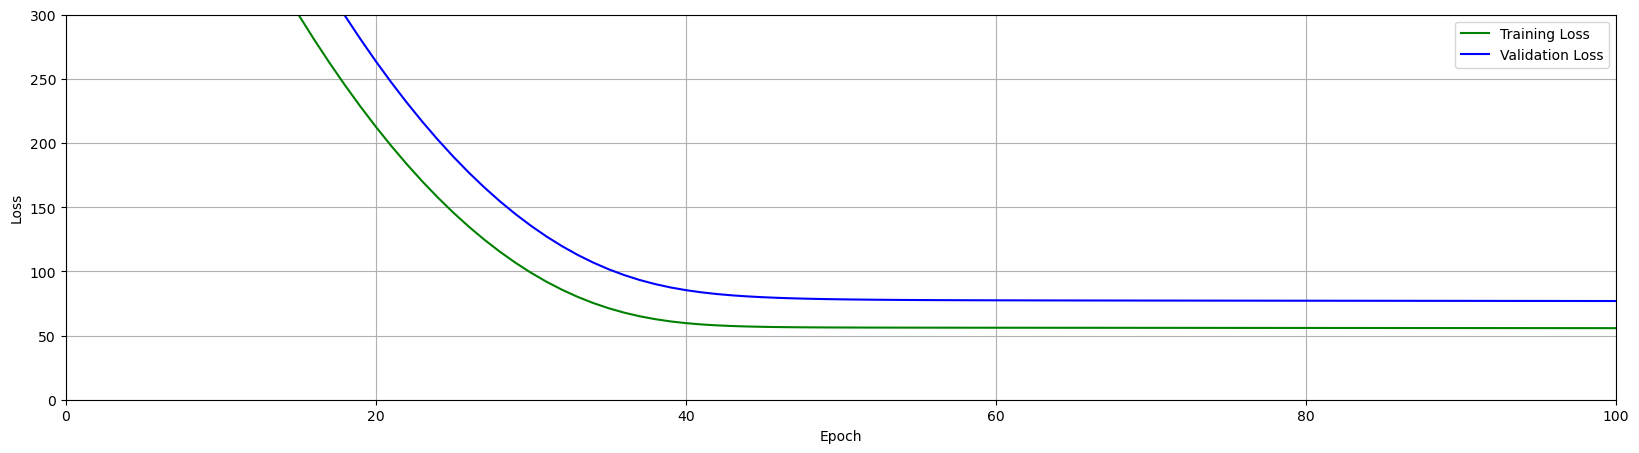

In [5]:
## Model Fitting

start_time = time.time()

history = model.fit(X_train_1d,
                    y_train,
                    batch_size=16,
                    epochs=101,
                    validation_split=0.3)

end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

## Validation

def plot_loss(history):
    plt.figure(figsize=(20, 5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted price of a home with 3 rooms: $12.1K
Predicted price of a home with 4 rooms: $15.2K
Predicted price of a home with 5 rooms: $18.3K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.4K
Prediction time: 0.006158 seconds per prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/var/folders/zg/4lxf2n2x6x3f94w2q2hvvl7m0000gn/T/ipykernel_14693/3592382815.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))


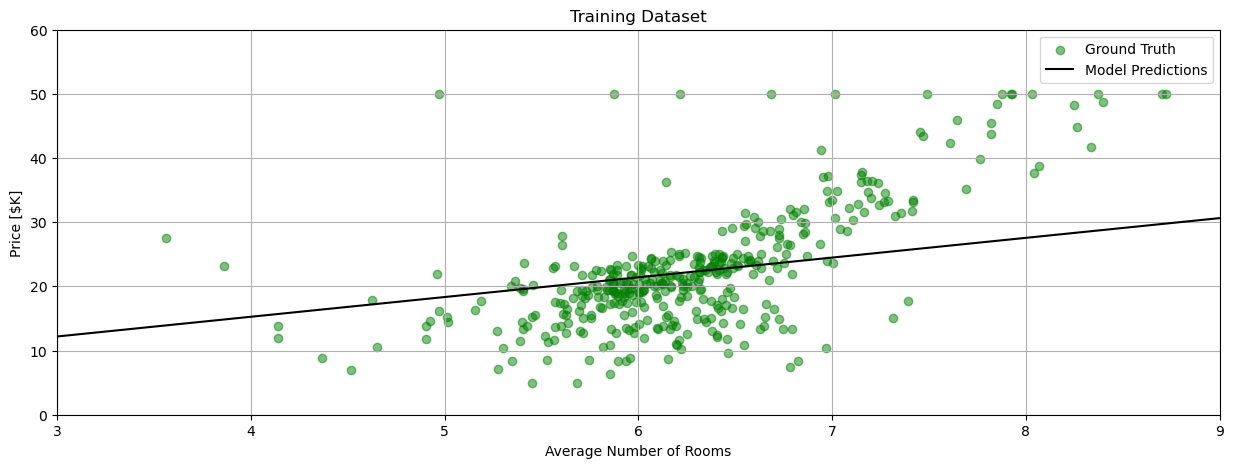

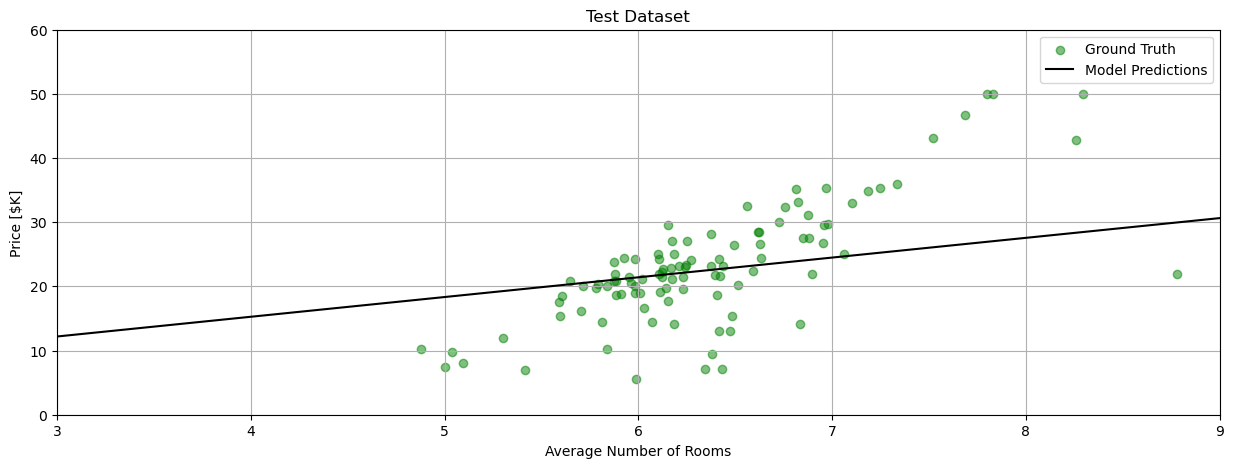

In [6]:
## Prediction

x = np.array([3, 4, 5, 6, 7])  # Convert list to NumPy array

start_time = time.time()

y_pred = model.predict(x)

end_time = time.time()
prediction_time = end_time - start_time

for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

print("Prediction time: {:.6f} seconds per prediction".format(prediction_time / len(x)))

# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

## Conclusion

def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15, 5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3, 9])
    plt.ylim([0, 60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

plot_data(X_test_1d, y_test, x, y, title='Test Dataset')